# Lese inn og plott vinddata

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
da = xr.open_dataset('/Data/gfi/share/ModData/NORA3-WP/NORA3-WP-ncfile/WindPower_capacity_factor_monthly.nc',decode_times=False)

In [3]:
# Ta ut 2-D felt av 5-D Feltet... Bare for å vise eksempel på hvordan man kan plotte
d1 = da.isel(T=0,M=0,turbine=0,Z=0)

Plot:

In [4]:
#velg projeksjon, her fra sånn det er vedlagt i dataset, den kan jo endres
crs =ccrs.LambertConformal(central_latitude=66.3,central_longitude=-42,standard_parallels=(66.3,66.3))

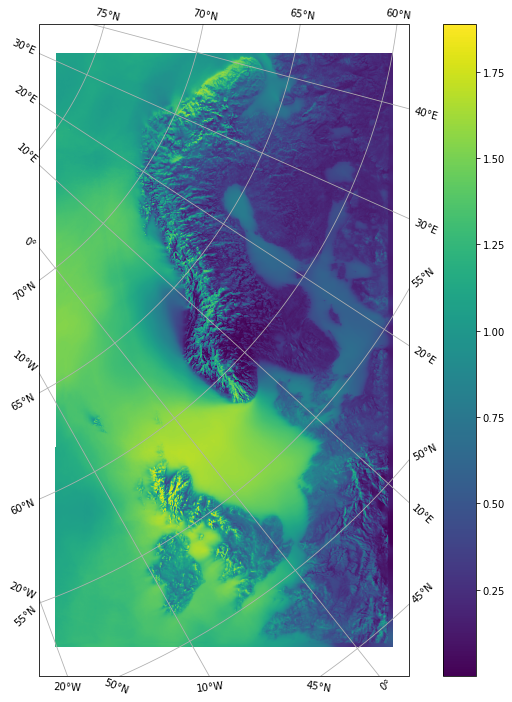

In [5]:
fig,ax = plt.subplots(subplot_kw={'projection':crs},figsize=(12,12))
c = ax.pcolormesh(d1.lon,d1.lat,d1.WindPower_capacity_factor_monthly,transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,x_inline=False,y_inline=False)
fig.colorbar(c)

Kartet er jo rotert litt pussig, vanligere at 0-meridianen er den som er rett opp - da må vi endre `central_longitude=-42` to `central_longitude=0`... Men da blir det mye hvitt

In [6]:
crs =ccrs.LambertConformal(central_latitude=66.3,central_longitude=0,standard_parallels=(66.3,66.3))

In [8]:
fig,ax = plt.subplots(subplot_kw={'projection':crs},figsize=(12,12))
c = ax.pcolormesh(d1.lon,d1.lat,d1.WindPower_capacity_factor_monthly,cmap='viridis',transform=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,x_inline=False,y_inline=False,color='gray')
fig.colorbar(c)